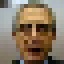

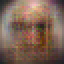

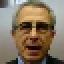

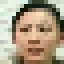

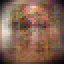

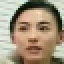

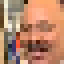

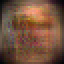

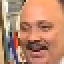

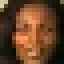

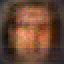

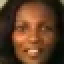

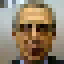

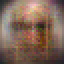

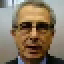

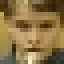

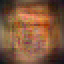

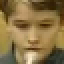

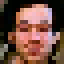

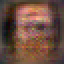

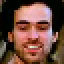

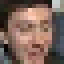

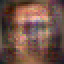

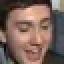

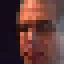

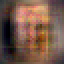

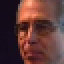

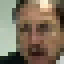

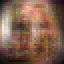

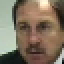

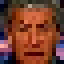

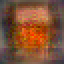

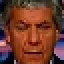

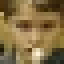

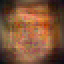

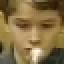

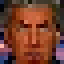

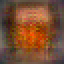

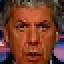

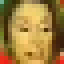

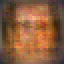

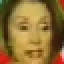

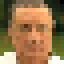

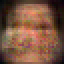

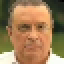

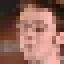

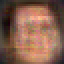

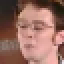

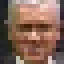

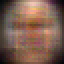

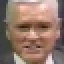

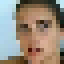

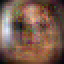

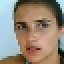

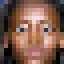

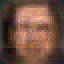

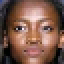

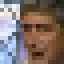

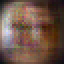

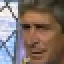

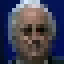

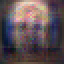

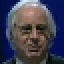

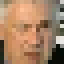

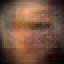

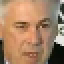

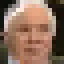

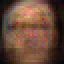

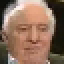

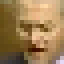

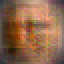

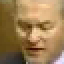

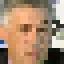

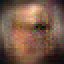

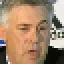

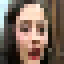

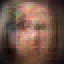

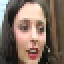

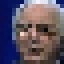

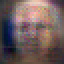

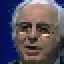

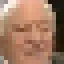

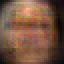

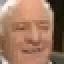

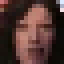

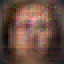

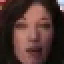

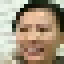

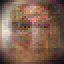

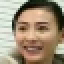

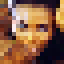

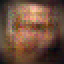

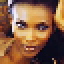

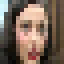

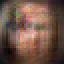

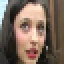


validation error is 0.1208	


In [5]:
image = require 'image'
require 'nn'

inputdir = 'validation/'

inputfiles = {}
labelfiles = {}

numExamples = 0
for file in paths.files(inputdir) do
   if file:find('png' .. '$') then
        if file:find('input') then
            table.insert(inputfiles, paths.concat(inputdir,file))
            numExamples = numExamples + 1
        else
            table.insert(labelfiles, paths.concat(inputdir,file))
        end
   end
end
n = numExamples

table.sort(inputfiles, function (a,b) return a < b end)
table.sort(labelfiles, function (a,b) return a < b end)

valinputs = torch.FloatTensor(n, 3, 16, 16)
vallabels = torch.FloatTensor(n, 3, 32, 32)

for vi = 1, n do
    if inputfiles[vi] ~= nil then
        valinputs[vi] = image.load(inputfiles[vi])
        vallabels[vi] = image.load(labelfiles[vi])
    end
end

gen = torch.load('srez_model.t7')
-- gen:float()
outputs = gen:forward(valinputs)
criterion = nn.AbsCriterion()

for vi = 1, n do
--     itorch.image(valinputs[vi])
--     itorch.image(outputs[vi])
--     itorch.image(vallabels[vi])
    itorch.image(image.scale(valinputs[vi], 64, 64, 'simple'))
    itorch.image(image.scale(outputs[vi], 64, 64, 'simple'))
    itorch.image(image.scale(vallabels[vi], 64, 64, 'simple'))
end
valerr = criterion:forward(outputs, vallabels)
print(('\nvalidation error is %.4f'):format(valerr))
